In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

In [ ]:
pip install py7zr

In [3]:
from py7zr import SevenZipFile
import os

# Define the path to the .7z archive file
archive_file_path = 'Knuckle_IITD.7z'

# Define the directory
extract_dir = 'extracted_folder'

# Create a directory to extract the contents if it doesn't exist
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

# Extract the contents of the .7z archive
with SevenZipFile(archive_file_path, mode='r') as archive:
    archive.extractall(path=extract_dir)

# List the contents of the extracted folder
extracted_files = os.listdir(extract_dir)
print("Extracted files:", extracted_files)



Extracted files: ['079_3.bmp', '082_4.bmp', '032_4.bmp', '088_4.bmp', '041_5.bmp', '027_4.bmp', '149_3.bmp', '025_2.bmp', '048_4.bmp', '141_3.bmp', '156_1.bmp', '067_4.bmp', '096_5.bmp', '054_3.bmp', '143_1.bmp', '051_5.bmp', '109_3.bmp', '135_1.bmp', '081_2.bmp', '143_2.bmp', '088_1.bmp', '030_3.bmp', '110_5.bmp', '024_2.bmp', '135_5.bmp', '033_5.bmp', '025_4.bmp', '092_3.bmp', '022_2.bmp', '042_1.bmp', '096_1.bmp', '100_2.bmp', '037_4.bmp', '062_3.bmp', '106_3.bmp', '053_3.bmp', '015_5.bmp', '114_3.bmp', '090_3.bmp', '147_5.bmp', '110_1.bmp', '061_5.bmp', '089_3.bmp', '146_2.bmp', '107_1.bmp', '079_4.bmp', '129_3.bmp', '146_3.bmp', '075_2.bmp', '044_1.bmp', '075_5.bmp', '029_5.bmp', '122_2.bmp', '117_2.bmp', '157_1.bmp', '115_2.bmp', '128_1.bmp', '084_4.bmp', '085_4.bmp', '139_5.bmp', '086_4.bmp', '061_3.bmp', '104_4.bmp', '084_3.bmp', '011_4.bmp', '040_1.bmp', '087_4.bmp', '028_1.bmp', '013_1.bmp', '155_3.bmp', '131_1.bmp', '104_1.bmp', '001_5.bmp', '044_2.bmp', '055_3.bmp', '144_5.

Feature extraction

In [4]:
import os
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model

In [5]:
model = VGG16()
model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
print(model.summary())

553467096/553467096 [==============================] - 4s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [6]:
# Path to the folder containing the original images
extracted_folder_path = 'extracted_folder'

# Path to the folder where augmented images will be saved
augmented_folder_path = 'augmented_images_new'

# Create the output folder if it doesn't exist
if not os.path.exists(augmented_folder_path):
    os.makedirs(augmented_folder_path)

files_dict = {}
for image in os.listdir(extracted_folder_path):
  value = image.split('_')[0]
  files_dict[value] = 0
print(files_dict)


{'079': 0, '082': 0, '032': 0, '088': 0, '041': 0, '027': 0, '149': 0, '025': 0, '048': 0, '141': 0, '156': 0, '067': 0, '096': 0, '054': 0, '143': 0, '051': 0, '109': 0, '135': 0, '081': 0, '030': 0, '110': 0, '024': 0, '033': 0, '092': 0, '022': 0, '042': 0, '100': 0, '037': 0, '062': 0, '106': 0, '053': 0, '015': 0, '114': 0, '090': 0, '147': 0, '061': 0, '089': 0, '146': 0, '107': 0, '129': 0, '075': 0, '044': 0, '029': 0, '122': 0, '117': 0, '157': 0, '115': 0, '128': 0, '084': 0, '085': 0, '139': 0, '086': 0, '104': 0, '011': 0, '040': 0, '087': 0, '028': 0, '013': 0, '155': 0, '131': 0, '001': 0, '055': 0, '144': 0, '083': 0, '031': 0, '095': 0, '138': 0, '140': 0, '136': 0, '036': 0, '105': 0, '016': 0, '068': 0, '113': 0, '112': 0, '002': 0, '038': 0, '072': 0, '009': 0, '119': 0, '071': 0, '004': 0, '127': 0, '026': 0, '116': 0, '120': 0, '101': 0, '007': 0, '070': 0, '150': 0, '152': 0, '008': 0, '049': 0, '050': 0, '091': 0, '060': 0, '154': 0, '018': 0, '077': 0, '021': 0,

In [ ]:
import os
import cv2
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

# Function to perform data augmentation
def augment_images(image_path):

    # Image rotation
    # Initialize ImageDataGenerator for augmentation
    datagen = ImageDataGenerator(rotation_range=20, fill_mode='nearest')

    # Read the image using cv2
    img = cv2.imread(image_path)

    # Expand dimensions to match expected input shape for the generator

    # Adding the actual image to new augmented folder
    filenumber = (image_path.split('/')[1]).split('_')[0]
    new_filename = filenumber + '_augmented_' + str(files_dict[filenumber]) + '.bmp'
    files_dict[filenumber]+=1
    new_image_path = os.path.join(augmented_folder_path, new_filename)
    cv2.imwrite(new_image_path, img)

    img = np.expand_dims(img, axis=0)

    # Now, you can create the iterator
    aug_iter = datagen.flow(img, batch_size=1)

    # Generate samples and collect them in a list
    images = []
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(5,5))
    for i in range(3):  # Generating 3 augmented images
        # Convert to unsigned integers
        augmented_image = next(aug_iter)[0].astype('uint8')
        ax[i].imshow(augmented_image)
        ax[i].axis('off')
        # Construct the new filename
        filenumber = (image_path.split('/')[1]).split('_')[0]
        new_filename = filenumber + '_augmented_' + str(files_dict[filenumber]) + '.bmp'
        files_dict[filenumber]+=1
        new_image_path = os.path.join(augmented_folder_path, new_filename)

        # Save the augmented image
        cv2.imwrite(new_image_path, augmented_image)
        #images.append(augmented_image)
    #plt.show()

    # Image shifting

    datagen = ImageDataGenerator(width_shift_range=0.05, height_shift_range=0.2)

    # iterator
    aug_iter = datagen.flow(img, batch_size=1)

    # generate samples and plot
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(5,5))

    # generate batch of images
    for i in range(3):

      # convert to unsigned integers
      image = next(aug_iter)[0].astype('uint8')

      # plot image
      ax[i].imshow(image)
      ax[i].axis('off')
      filenumber = (image_path.split('/')[1]).split('_')[0]
      new_filename = filenumber + '_augmented_' + str(files_dict[filenumber]) + '.bmp'
      files_dict[filenumber]+=1
      new_image_path = os.path.join(augmented_folder_path, new_filename)

      # Save the augmented image
      cv2.imwrite(new_image_path, augmented_image)
      #images.append(augmented_image)
    #plt.show()

# Loop through each image in the input folder
#for filename in os.listdir(input_folder_path):
for file in os.listdir(extracted_folder_path):
  image_path = os.path.join(extracted_folder_path, file)
  augment_images(image_path)


-------------- Feature Extraction ---------------------

In [11]:
features = []
directory = augmented_folder_path
for image in os.listdir(directory):
  image_path = directory+'/'+image
  # loading the image
  img = load_img(image_path, target_size=(224, 224))
  img = img_to_array(img)
  #print(img.shape)

  # preprocessing the image
  img = preprocess_input(img)
  img = np.expand_dims(img, axis=0)

  # predicting on the image using the model
  feature = model.predict(img, verbose=0)
  label = (image_path.split('/')[1]).split('_')[0]
  feature = np.append(feature, label)
  features.append(feature)
features = np.vstack(features)



In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
np.random.shuffle(features)
n = int(0.8*features.shape[0])
X = features[:, :-1]
Y = features[:, -1].astype(np.int32)
x_train = X[:n]
x_test = X[n:]
y_train = Y[:n]
y_test = Y[n:]
x_train.shape, x_test.shape, y_train.shape, y_test.shape
#y_train[:5]


((4424, 1000), (1106, 1000), (4424,), (1106,))

In [14]:
print(y_train[0])

144


In [15]:
y_train = y_train.astype(np.int32) -1
y_test = y_test.astype(np.int32) - 1

In [16]:
y_train

array([143, 130, 156, ...,  93,  59,  11], dtype=int32)

In [17]:
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

In [18]:
x_test[0].shape

(1000,)

In [19]:
from keras.utils import to_categorical

# One-hot encode the labels
y_one_hot = to_categorical(y_train, num_classes = 158)

print("Shape of one-hot encoded labels:", y_one_hot.shape)
print("Example one-hot encoded label:", y_one_hot[0])

Shape of one-hot encoded labels: (4424, 158)
Example one-hot encoded label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [20]:
y_one_hot.shape

(4424, 158)

In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras import layers

-----------------  Model Architecture --------------

In [22]:
model_ = tf.keras.Sequential(
    [layers.Dense(units = 256, activation = 'relu', input_shape = (1000, )),
     layers.Dense(units = 200, activation = 'relu'),
     layers.Dense(units = 158, activation = 'softmax')]
)

model_.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               256256    
                                                                 
 dense_1 (Dense)             (None, 200)               51400     
                                                                 
 dense_2 (Dense)             (None, 158)               31758     
                                                                 
Total params: 339414 (1.29 MB)
Trainable params: 339414 (1.29 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model_.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model_.fit(x_train, y_one_hot, batch_size = 30, epochs = 300)

In [ ]:
for i in range(10):
  input_data = np.expand_dims(x_test[i], axis=0)
  predictions = model_.predict(input_data)
  max_index = np.argmax(predictions)
  print(max_index, y_test[i])

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Image Enhancement


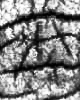

In [5]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

def enhance_knuckle_image(image_path):
    # Step 1: Divide the image into 10x10 sub-blocks and compute the block-wise average
    N = 256  # Constant for division
    block_size = (10, 10)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    height, width = image.shape
    block_averages = np.zeros((height // block_size[0], width // block_size[1]), dtype=np.uint8)
    for i in range(0, height, block_size[0]):
        for j in range(0, width, block_size[1]):
            block = image[i:i+block_size[0], j:j+block_size[1]]
            block_average = np.sum(block) // N
            block_averages[i // block_size[0], j // block_size[1]] = block_average

    # Step 2: Construct background illumination image using bi-cubic interpolation
    background_illumination = cv2.resize(block_averages, (width, height), interpolation=cv2.INTER_CUBIC)

    # Step 3: Normalize uneven illumination by subtracting background illumination
    normalized_image = cv2.subtract(image, background_illumination)

    # Step 4: Apply histogram equalization to the normalized image
    enhanced_image = cv2.equalizeHist(normalized_image)

    return enhanced_image

# Example usage:
image_path = '/content/004_2.bmp'
enhanced_image = enhance_knuckle_image(image_path)
cv2_imshow(enhanced_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
